<a href="https://colab.research.google.com/github/PasinduDil/animal-classification-/blob/main/ml_gr02_mlproject_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Load Dataset

In [2]:
X_train = np.loadtxt('/kaggle/input/dataset122132/input.csv', delimiter = ',')
Y_train = np.loadtxt('/kaggle/input/dataset122132/labels.csv', delimiter = ',')

X_test = np.loadtxt('/kaggle/input/dataset122132/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('/kaggle/input/dataset122132/labels_test.csv', delimiter = ',')

FileNotFoundError: /kaggle/input/dataset122132/input.csv not found.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)


Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


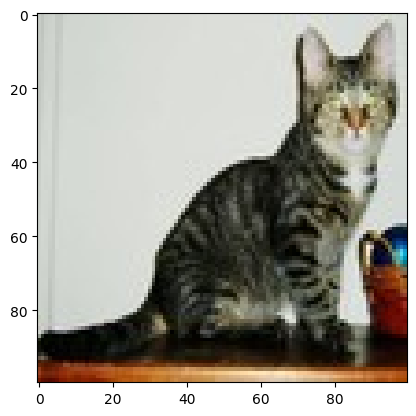

In [ ]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

## model

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 379ms/step - accuracy: 0.5029 - loss: 0.8402
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 381ms/step - accuracy: 0.5838 - loss: 0.6799
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 370ms/step - accuracy: 0.6631 - loss: 0.6381
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 392ms/step - accuracy: 0.6794 - loss: 0.5986
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 387ms/step - accuracy: 0.7224 - loss: 0.5583


In [ ]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.6947 - loss: 0.5968


[0.5955091714859009, 0.6825000047683716]

# predictions

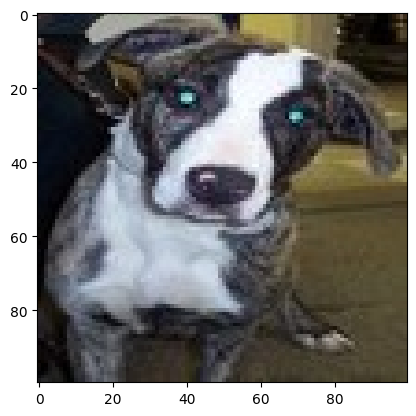

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Our model says it is a : dog


In [ ]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)